<a href="https://colab.research.google.com/github/eugineT/ViewershipAnalysis/blob/main/Viewership_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTS

Imports

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load csv

In [128]:
views = pd.read_csv('/Viewership Analysis .xlsx - Data.csv', on_bad_lines='skip')
views.head(15)

,DateID,CustomerID,TotalTimeWatched,Platform,PlayEventType,VideoTitle
0,20201101,EW1DENH0EC1J3M9WAOZF9LSV004O,300,Leanback,LiveTV,F1 '20: Emilia Romagna GP
1,20201101,EW1DENH0EC1J3M9WAOZF9LSV004O,300,Leanback,LiveTV,F1 '20: Emilia Romagna GP
2,20201101,6TS2LLY0L3G66FVY86Q0JEZE000K,360,Leanback,Other,Chasing The Sun
3,20201101,6TS2LLY0L3G66FVY86Q0JEZE000K,360,Leanback,Other,Chasing The Sun
4,20201101,6PMV67PLJ2S47S68J0Y30XFK003C,120,Leanback,LiveTV,Sonic The Hedgehog
5,20201101,6PMV67PLJ2S47S68J0Y30XFK003C,120,Leanback,LiveTV,Frozen II
6,20201101,6PMV67PLJ2S47S68J0Y30XFK003C,120,iOS,LiveTV,PL 20/21: Man Utd v Arsenal
7,20201101,6PMV67PLJ2S47S68J0Y30XFK003C,120,iOS,LiveTV,PL 20/21: Man Utd v Arsenal
8,20201101,6PMV67PLJ2S47S68J0Y30XFK003C,60,iOS,LiveTV,F1 '20: Emilia Romagna GP
9,20201101,6PMV67PLJ2S47S68J0Y30XFK003C,600,iOS,LiveTV,F1 '20: Emilia Romagna GP


Check for NULL Values

In [129]:
views.isnull().sum()

,0
DateID,0
CustomerID,0
TotalTimeWatched,0
Platform,0
PlayEventType,0
VideoTitle,0


Sentimental Analysis

In [130]:
!install textblob

install: missing destination file operand after 'textblob'
Try 'install --help' for more information.


In [131]:
from textblob import TextBlob

In [132]:
views.head(6)

,DateID,CustomerID,TotalTimeWatched,Platform,PlayEventType,VideoTitle
0,20201101,EW1DENH0EC1J3M9WAOZF9LSV004O,300,Leanback,LiveTV,F1 '20: Emilia Romagna GP
1,20201101,EW1DENH0EC1J3M9WAOZF9LSV004O,300,Leanback,LiveTV,F1 '20: Emilia Romagna GP
2,20201101,6TS2LLY0L3G66FVY86Q0JEZE000K,360,Leanback,Other,Chasing The Sun
3,20201101,6TS2LLY0L3G66FVY86Q0JEZE000K,360,Leanback,Other,Chasing The Sun
4,20201101,6PMV67PLJ2S47S68J0Y30XFK003C,120,Leanback,LiveTV,Sonic The Hedgehog
5,20201101,6PMV67PLJ2S47S68J0Y30XFK003C,120,Leanback,LiveTV,Frozen II


In [133]:
TextBlob("Chasing The Sun").sentiment.polarity

0.0

In [134]:
polarity = []

for title in views['VideoTitle']:
    try:
        polarity.append(TextBlob(title).sentiment.polarity)
    except:
        polarity.append(0)

views['Chasing The Sun'] = polarity
display(views.head())

,DateID,CustomerID,TotalTimeWatched,Platform,PlayEventType,VideoTitle,Chasing The Sun
0,20201101,EW1DENH0EC1J3M9WAOZF9LSV004O,300,Leanback,LiveTV,F1 '20: Emilia Romagna GP,0.0
1,20201101,EW1DENH0EC1J3M9WAOZF9LSV004O,300,Leanback,LiveTV,F1 '20: Emilia Romagna GP,0.0
2,20201101,6TS2LLY0L3G66FVY86Q0JEZE000K,360,Leanback,Other,Chasing The Sun,0.0
3,20201101,6TS2LLY0L3G66FVY86Q0JEZE000K,360,Leanback,Other,Chasing The Sun,0.0
4,20201101,6PMV67PLJ2S47S68J0Y30XFK003C,120,Leanback,LiveTV,Sonic The Hedgehog,0.0


In [135]:
len(polarity)

118534

Perform Explotary Data Analysis (EDA)

In [136]:
from textblob import TextBlob

polarity = []

for title in views['VideoTitle'].dropna():
    try:
        polarity.append(TextBlob(title).sentiment.polarity)
    except:
        polarity.append(0)

views['Sentiment_Polarity'] = polarity

filter1 = views['Sentiment_Polarity']==1

In [137]:
comments_positive = views[filter1]


In [138]:
filter2 = views['Sentiment_Polarity']==-1

In [139]:
comments_negative = views[filter2]


In [140]:
comments_positive.head(25)


,DateID,CustomerID,TotalTimeWatched,Platform,PlayEventType,VideoTitle,Chasing The Sun,Sentiment_Polarity
429,20201114,M342MBRPEUXXGC124LOJ1MX90025,60,Web,LiveTV,Legendary,1.0,1.0
727,20201118,L7UT70HJDZGQALW3CH5HKVCS006G,120,Leanback,Other,The Dude Perfect Show,1.0,1.0
729,20201119,68WQ5Y219XYF0ZPF1JOV7VRL000G,2940,Leanback,LiveTV,The Perfect Storm,1.0,1.0
1082,20201125,9UTVHJ8UFNFLKD9I2GBDH2XY0032,180,Leanback,Other,EFC Best of,1.0,1.0
1104,20201125,JQS323ZH4BS4ET7JIXS559R1005D,2520,Leanback,Other,Food: Delicious Science,1.0,1.0
1230,20201127,3YC9CJQ8AWSS9525KRZ0ADRI004S,120,Leanback,Other,EFC Best of,1.0,1.0
1281,20201128,MEIK8UG61FDV4ZCC4BW31QQ90031,480,Leanback,Other,Legendary,1.0,1.0
1295,20201128,MEIK8UG61FDV4ZCC4BW31QQ90031,1260,Leanback,LiveTV,Best Of The Week,1.0,1.0
1516,20201203,B11KIU4ALVTN81A9JPCAKP1C004Z,240,Leanback,LiveTV,The World's Best Restaurants,1.0,1.0
1517,20201203,B11KIU4ALVTN81A9JPCAKP1C004Z,60,Leanback,LiveTV,The World's Best Restaurants,1.0,1.0


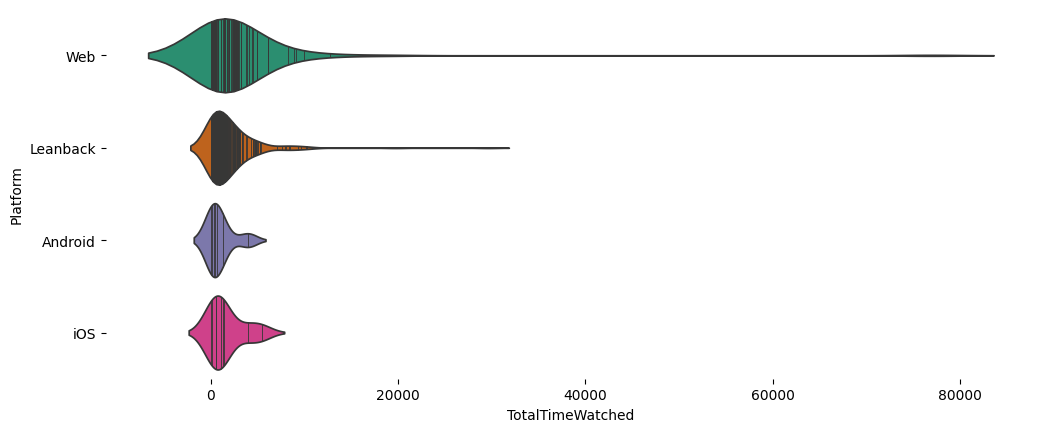

In [141]:
# @title Platform vs TotalTimeWatched

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(comments_positive['Platform'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(comments_positive, x='TotalTimeWatched', y='Platform', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [142]:
!pip install wordcloud

In [143]:
from wordcloud import WordCloud , STOPWORDS


In [144]:
set(STOPWORDS)


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [145]:
views['VideoTitle']

,VideoTitle
0,F1 '20: Emilia Romagna GP
1,F1 '20: Emilia Romagna GP
2,Chasing The Sun
3,Chasing The Sun
4,Sonic The Hedgehog
...,...
118529,New Day
118530,Buying And Selling With Property...
118531,Expresso
118532,Unknown


In [146]:
type(views['VideoTitle'])

pandas.core.series.Series

In [147]:
##frame our 'VideoTitle' feature into string
total_title_positive = ' '.join(comments_positive['VideoTitle'])

In [148]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_title_positive)


(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

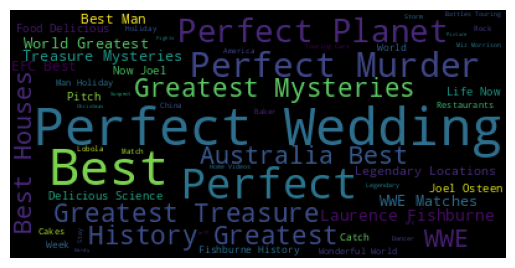

In [149]:
plt.imshow(wordcloud)
plt.axis('off')

In [150]:
total_title_negative = ' '.join(comments_negative['VideoTitle'])


In [151]:
wordcloud2 = WordCloud(stopwords=set(STOPWORDS)).generate(total_title_negative)

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

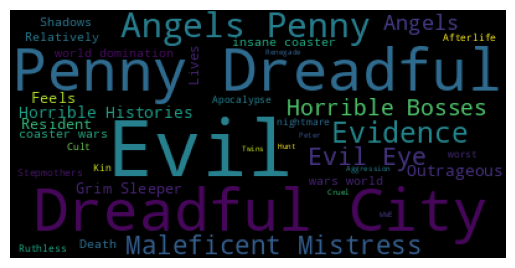

In [152]:
plt.imshow(wordcloud2)
plt.axis('off')

Emoji Analysis

In [153]:
!pip install emoji==2.2.0


In [154]:
import emoji


In [155]:
views = 'trending 😉'


In [156]:
[char for char in views if char in emoji.EMOJI_DATA]

['😉']

In [157]:
from sys import version_info
emoji_list = []

for char in version_info:
    if char in emoji.EMOJI_DATA:
        emoji_list.append(char)

In [158]:
emoji_list

[]

in case u have missing values , call dropna()

In [159]:
views = pd.read_csv('/Viewership Analysis .xlsx - Data.csv', on_bad_lines='skip')

all_emojis_list = []

for comment in views['VideoTitle'].dropna():
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emojis_list.append(char)

In [160]:
from collections import Counter

In [161]:
emoji_counts = Counter(all_emojis_list).most_common(10)
emojis = [emoji[0] for emoji in emoji_counts]
freqs = [emoji[1] for emoji in emoji_counts]

In [162]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [163]:
trace = go.Bar(x=emojis , y=freqs)

In [164]:
iplot([trace])


([0, 1, 2, 3],
 [Text(0, 0, 'LiveTV'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Catch Up'),
  Text(3, 0, 'Downloads')])

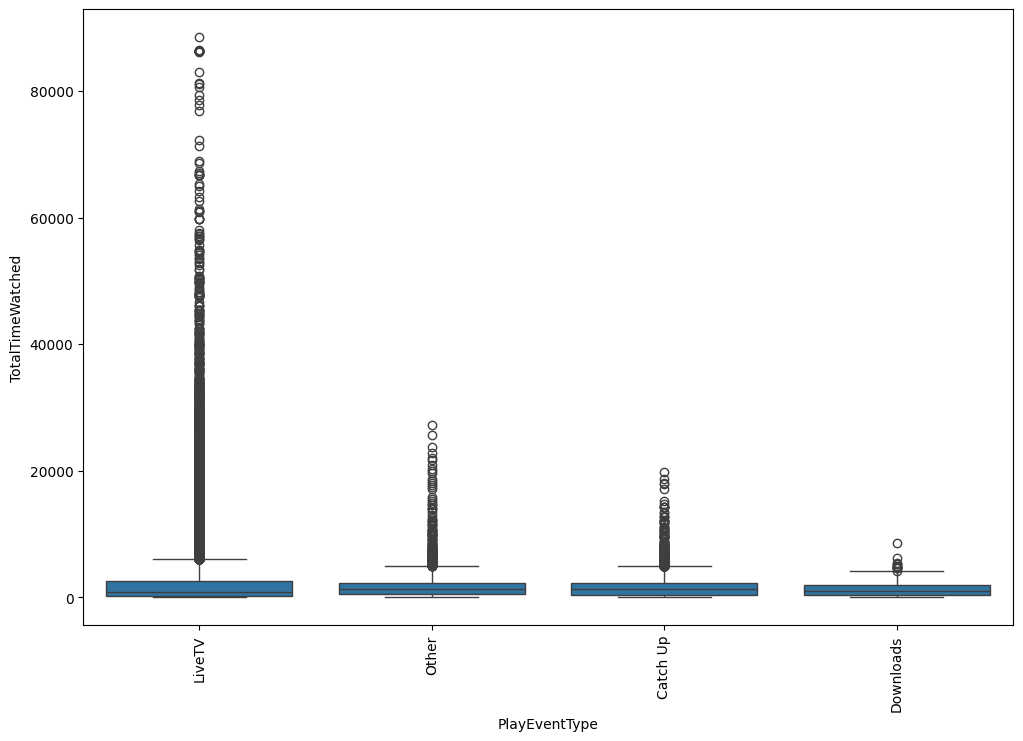

In [165]:
plt.figure(figsize=(12,8))
sns.boxplot(x='PlayEventType' , y='TotalTimeWatched', data=views)
plt.xticks(rotation='vertical')

In [166]:
views['VideoTitle'].value_counts()

,count
VideoTitle,
Unknown,39210
Suidooster,1246
South Africa Tonight,1176
The Block Australia,907
7de Laan,824
...,...
BBC World News America,1
the eighties,1
Zoom In: #HBD Chance The Rapper,1


In [167]:
cdf = views.groupby(['VideoTitle']).size().sort_values(ascending=False).reset_index()


In [168]:
cdf = cdf.rename(columns={0:'total_videos'})


In [169]:
cdf

,VideoTitle,total_videos
0,Unknown,39210
1,Suidooster,1246
2,South Africa Tonight,1176
3,The Block Australia,907
4,7de Laan,824
...,...,...
8899,10 Things I Hate About You,1
8900,100% Maximo,1
8901,witness,1
8902,wild south africa,1


In [170]:
import plotly.express as px

In [171]:
px.bar(data_frame=cdf[0:20] , x='VideoTitle' , y='total_videos')

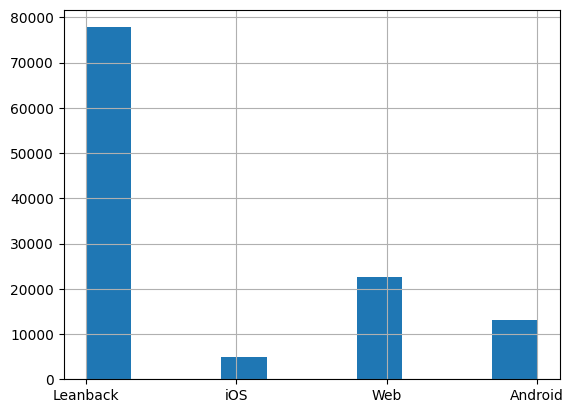

In [172]:
views['Platform'].hist(bins=10);